<div class="alert alert-block alert-info">

<h1 style="font-family:verdana;"> Description:</h1> 

<ul>
<li><p style="font-family:verdana;">
In this notebook, we are going to predict the Load status of customers , using various features such as gender, marital status, Education.
</p></li>
    
<li><p style="font-family:verdana;">
Dataset we are going to use is Loan prediction dataset.
Training dataset contains about 614 rows and 13 features and Testing dataset contains about 367 rows and 12 columns
</p></li> 

<li><p style="font-family:verdana;">
The problem statement is to identify the customers segments that are eligible for loan amount or not. So the problem we have is classification type.
</p></li>  
</ul>

</div>

## Import libraries and dataset


In [725]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [726]:
test=pd.read_csv(r"C:\Users\thendralarasu\OneDrive\Documents\SSN\Python for Data Science\python\Analytics vidhya hacathon\Loan prediction\test_lAUu6dG.csv")
train=pd.read_csv(r"C:\Users\thendralarasu\OneDrive\Documents\SSN\Python for Data Science\python\Analytics vidhya hacathon\Loan prediction\train_ctrUa4K.csv")

## Step 1: Descriptive analysis

In [727]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [728]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [729]:
# Training dataset dimensions - (rows, columns)
print("Training Data: \nRows: {} , Columns: {}".format(train.shape[0],train.shape[1]))
print("Testing Data: \nRows: {} , Columns: {}".format(test.shape[0],test.shape[1]))

Training Data: 
Rows: 614 , Columns: 13
Testing Data: 
Rows: 367 , Columns: 12


In [730]:
# Statistical summary
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [731]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [732]:
# Check for null values
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

Loan_ID               0.0 %
Gender               2.12 %
Married              0.49 %
Dependents           2.44 %
Education             0.0 %
Self_Employed        5.21 %
ApplicantIncome       0.0 %
CoapplicantIncome     0.0 %
LoanAmount           3.58 %
Loan_Amount_Term     2.28 %
Credit_History       8.14 %
Property_Area         0.0 %
Loan_Status           0.0 %
dtype: object

In [733]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [734]:
# check for the proportion of yes and no in Loan status
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

### Encoding Catogorial varialbels

In [735]:
#Loan Status Encoding
train.Loan_Status = train.Loan_Status.replace({'Y': 1, 'N': 0})

In [736]:
#Gender encodingt
train.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [737]:
train.Gender = train.Gender.replace({'Male':1,'Female':0})
test.Gender = test.Gender.replace({'Male':1,'Female':0})

In [738]:
# Married encoding
train.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [739]:
train.Married = train.Married.replace({'Yes':1 , 'No':0})
test.Married = test.Married.replace({'Yes':1 , 'No':0})

In [740]:
# Education encoding
train.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [741]:
train.Education = train.Education.replace({'Graduate':1, 'Not Graduate':0})
test.Education = test.Education.replace({'Graduate':1 , 'Not Graduate':0})

In [742]:
# Self_Employed encoding
train.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [743]:
train.Self_Employed = train.Self_Employed.replace({'Yes':1, 'No':0})
test.Self_Employed = test.Self_Employed.replace({'Yes':1, 'No':0})

In [744]:
# Property_Area encoding
train.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [745]:
train.Property_Area = train.Property_Area.replace({'Rural': 0, 'Urban': 1, 'Semiurban': 2})
test.Property_Area = test.Property_Area.replace({'Rural': 0, 'Urban': 1, 'Semiurban': 2})

In [746]:
# Replace the 3+ in Dependents into 3
train.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [747]:
train.Dependents = train.Dependents.replace("3+",3)
test.Dependents = test.Dependents.replace("3+",3)

In [748]:
train.CoapplicantIncome = train.CoapplicantIncome.astype(int)

In [749]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0,NaN,360.0,1.0,1,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0,66.0,360.0,1.0,1,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358,120.0,360.0,1.0,1,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0,141.0,360.0,1.0,1,1


In [750]:
# drop Loan_ID
Loan_id = test['Loan_ID']
train= train.drop('Loan_ID',axis=1)
test= test.drop('Loan_ID',axis=1)

### Replacing Null values with median

In [751]:
train.fillna(train.median(),inplace=True)
test.fillna(test.median(),inplace=True)

In [754]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [755]:
# Convert the train data to numeric
for col in train.columns:
    train[col]= pd.to_numeric(train[col]).astype(int)
for col in test.columns:
        test[col] = pd.to_numeric(test[col]).astype(int)

# Visualization

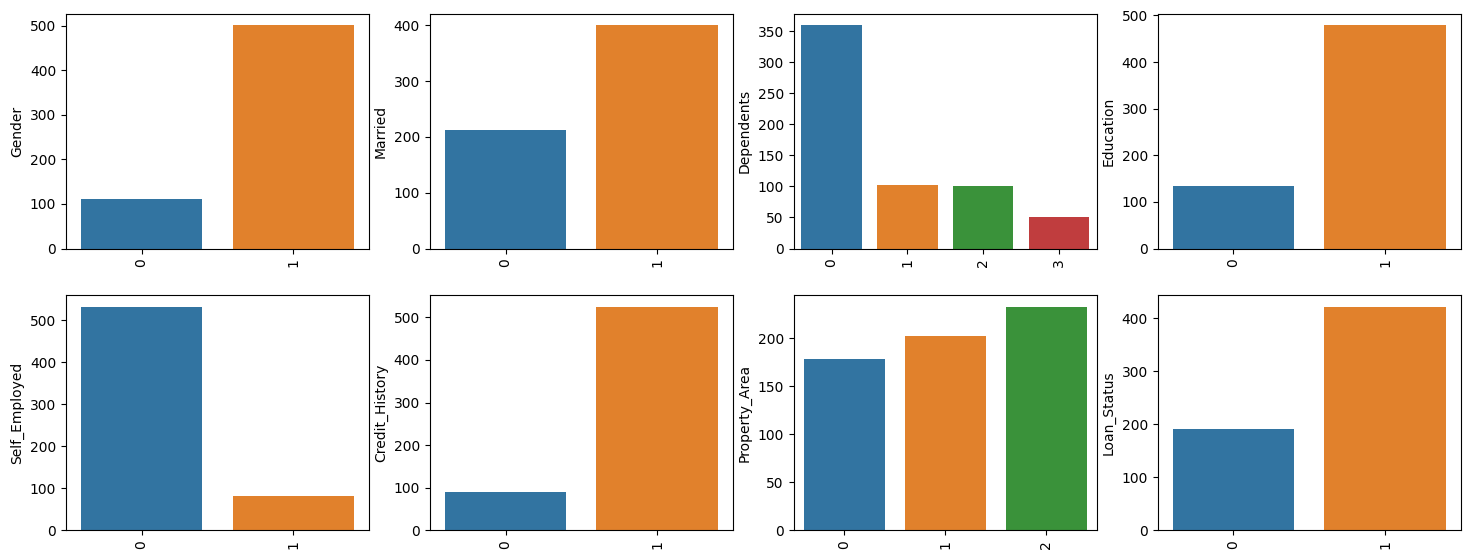

In [756]:
plt.figure(figsize=(18,36))
index = 1
  
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']:
  y = train[col].value_counts()
  plt.subplot(10,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

<AxesSubplot:>

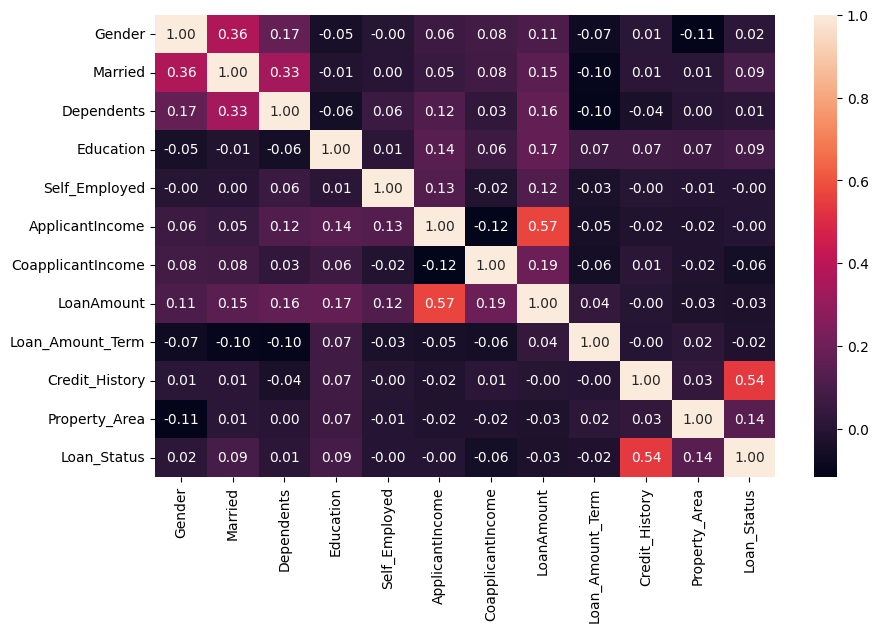

In [757]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True,fmt='.2f')# 

### The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

In [758]:
# Drop the columns which have less correlation with loan status
def correlationdrop(train, sl):
  columns = train.columns
  for col in columns:
      C=abs(train[col].corr(train['Loan_Status']))
      if C < sl:
        train=train.drop(columns=[col])
  return train

train= correlationdrop(train,0.05)
train.head()

,Married,Education,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,0,1,0,1,1,1
1,1,1,1508,1,0,0
2,1,1,0,1,1,1
3,1,0,2358,1,1,1
4,0,1,0,1,1,1


In [759]:
test=test[['Married', 'Education', 'CoapplicantIncome', 'Credit_History','Property_Area']]
test.head()

,Married,Education,CoapplicantIncome,Credit_History,Property_Area
0,1,1,0,1,1
1,1,1,1500,1,1
2,1,1,1800,1,1
3,1,1,2546,1,1
4,0,0,0,1,1


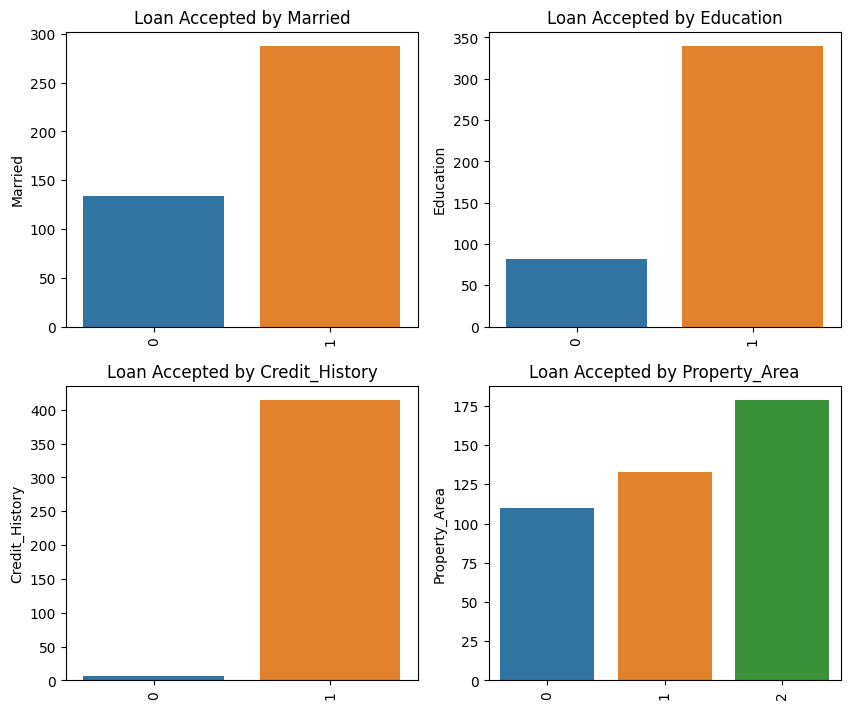

In [760]:
# check for loan accepting criteria
plt.figure(figsize=(10,36))
index = 1
  
for col in ['Married', 'Education', 'Credit_History','Property_Area']:
  y = train[col][train.Loan_Status==1].value_counts()
  plt.subplot(8,2,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  plt.title("Loan Accepted by {}".format(col))
  index +=1

### There is a strong relationship between credit history and loan status.if there is no credits history means loan will not be approved 

Text(0.5, 1.0, 'Loan accepted by Coaplicant Income')

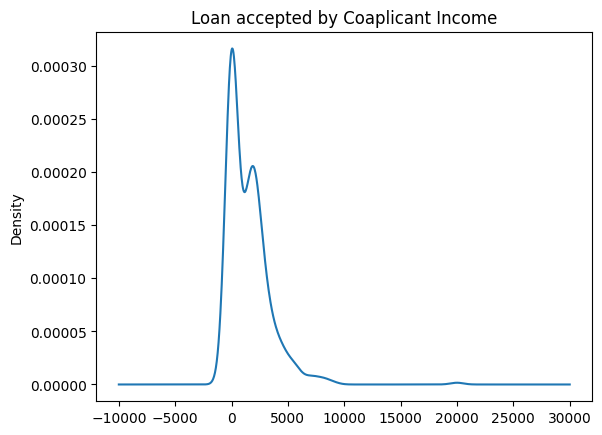

In [761]:
# check loan approved status for CoapplicantIncome
train.CoapplicantIncome[train.Loan_Status==1].plot(kind='kde')
plt.title('Loan accepted by Coaplicant Income') # Here kde plot is used because the CoapplicantIncome is not catagorical variable# 

In [762]:
train.head()

,Married,Education,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,0,1,0,1,1,1
1,1,1,1508,1,0,0
2,1,1,0,1,1,1
3,1,0,2358,1,1,1
4,0,1,0,1,1,1


In [763]:
X= train.drop('Loan_Status',axis=1)
y= train.Loan_Status

### Scaling

In [764]:
from sklearn.preprocessing import Normalizer
mm=Normalizer()
x=mm.fit_transform(X)

In [765]:
train.columns

Index(['Married', 'Education', 'CoapplicantIncome', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

# medianl built

In [766]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [767]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(491, 5)
(491,)
(123, 5)
(123, 5)


In [768]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

  
from sklearn import metrics
  
knn = KNeighborsClassifier(n_neighbors=25)
rfc = RandomForestClassifier(n_estimators = 20,criterion = 'entropy',random_state =7)
abc = AdaBoostClassifier(n_estimators=100,random_state=7)
lc = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=5)
xgbc = XGBClassifier(n_estimators = 50, max_depth = 4)


# making predictions on the training set
for clf in (rfc, abc , knn, lc, dt, xgbc):
    clf.fit(x_train, y_train)
    Y_pred = clf.predict(x_train)
    print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(y_train,Y_pred))

Accuracy score of  RandomForestClassifier = 89.40936863543789
Accuracy score of  AdaBoostClassifier = 82.28105906313645
Accuracy score of  KNeighborsClassifier = 74.33808553971487
Accuracy score of  LogisticRegression = 73.93075356415478
Accuracy score of  DecisionTreeClassifier = 83.29938900203666
Accuracy score of  XGBClassifier = 86.9653767820774


In [769]:
for clf in (rfc, abc, knn, lc, dt, xgbc):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy score of ", clf.__class__.__name__,"=", 100*metrics.accuracy_score(y_test, y_pred))

Accuracy score of  RandomForestClassifier = 75.60975609756098
Accuracy score of  AdaBoostClassifier = 78.86178861788618
Accuracy score of  KNeighborsClassifier = 69.91869918699187
Accuracy score of  LogisticRegression = 69.91869918699187
Accuracy score of  DecisionTreeClassifier = 78.04878048780488
Accuracy score of  XGBClassifier = 78.04878048780488


In [770]:
y_test_pred=abc.predict(test)

In [771]:
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [772]:
submission=pd.DataFrame()
submission['Loan_ID']=Loan_id
submission['Loan_Status']=y_test_pred

In [773]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [774]:
submission.Loan_Status=submission.Loan_Status.replace({1:'Y',0:'N'})
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [775]:
# submission.to_csv(r'C:\Users\thendralarasu\OneDrive\Documents\SSN\Python for Data Science\python\Analytics vidhya hacathon\Loan prediction\submission.csv',index=False)